K-Means

1.Importing Required Libraries

In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


2.Loading the Dataset

In [13]:
df = pd.read_csv("1632560262896716.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


3.Cleaning the Dataset

In [14]:
df = df.drop(['CustomerID'], axis=1)


In [15]:
df['Gender']=df['Gender'].replace({'Female': 0, 'Male': 1})


C:\Users\a.mohammadlou\AppData\Local\Temp\ipykernel_14820\2500753375.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender']=df['Gender'].replace({'Female': 0, 'Male': 1})


In [16]:
df=df.rename(columns={'Annual Income (k$)': 'AI', 'Spending Score (1-100)':'SS'})


In [17]:
df['Gender'].value_counts()


Gender
0    112
1     88
Name: count, dtype: int64

In [18]:
df.value_counts()


Gender  Age  AI  SS
0       18   65  48    1
        19   63  54    1
             65  50    1
        20   16  6     1
             37  75    1
                      ..
1       67   62  59    1
        68   63  43    1
        69   44  46    1
        70   46  56    1
             49  55    1
Name: count, Length: 200, dtype: int64

In [19]:
df.columns = ['Gender', 'Age', 'AI', 'SS']
df.head()


,Gender,Age,AI,SS
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


4.Normalizing the Data

In [20]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df)


5.Applying KMeans Clustering

In [21]:
kmeans = KMeans(n_clusters=5, random_state=42, init='k-means++', n_init='auto').fit(data_normalized)
clusters = kmeans.fit_predict(data_normalized)
labels = kmeans.labels_



6.Adding Cluster Labels to the DataFrame

In [22]:
df["Clusters"] = labels


7.3D Scatter Plot of KMeans Clustering

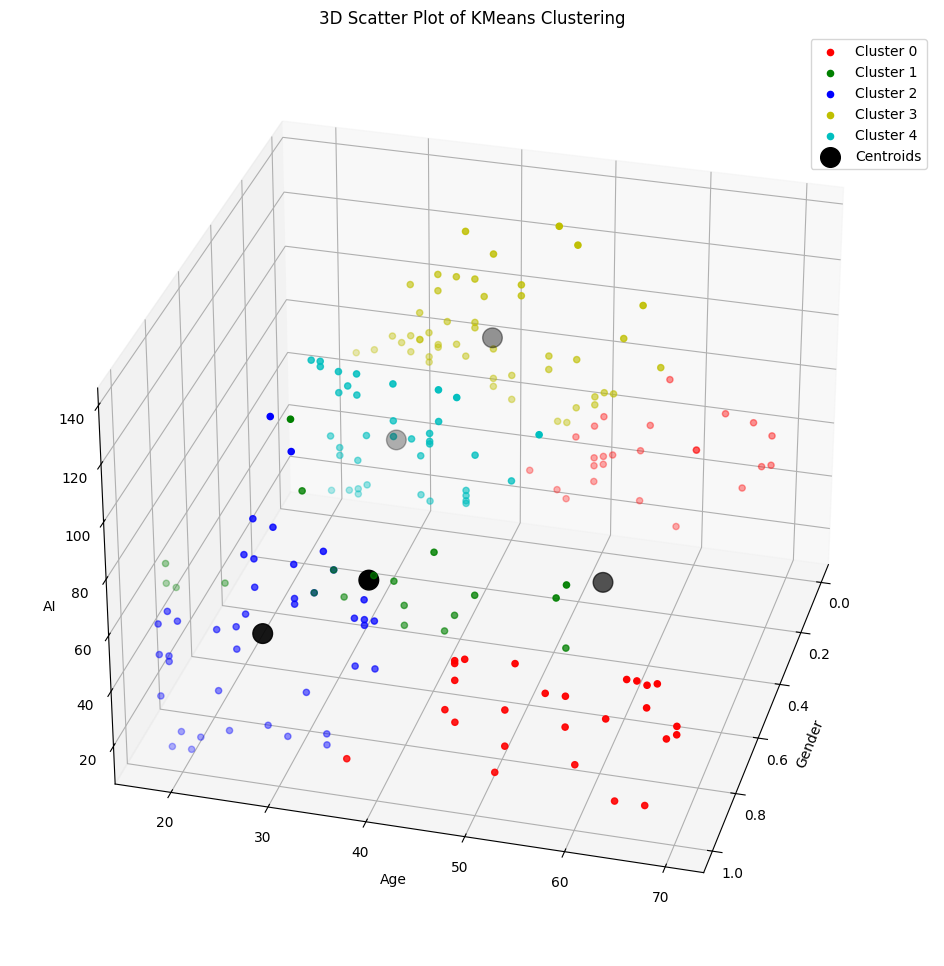

In [23]:
#Creating the 3D Scatter Plot
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

#Plotting the Data Points for Each Cluster
colors = ['r', 'g', 'b', 'y', 'c']
for cluster in range(5):
    X = df[df['Clusters'] == cluster]
    ax.scatter(X['Gender'],
               X['Age'],
               X['AI'],
               color = colors[cluster],
label = f'Cluster {cluster}')

#Plotting Cluster Centers
ceneters = scaler.inverse_transform(kmeans.cluster_centers_)
ax.scatter(ceneters[:, 0], ceneters[:, 1],ceneters[:, 2], c='k', s=200, label = 'Centroids')

#AX 3D View
ax.view_init(elev = 30, azim = 15)
    

#Adding Labels and Showing the Plot
plt.title('3D Scatter Plot of KMeans Clustering')
ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_zlabel('AI')
ax.legend()
plt.show()


Hierarchical

1.Import Required Libraries

In [24]:
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import seaborn as sns


2.Loading Data Set

In [25]:
print(df.head())


   Gender  Age  AI  SS  Clusters
0       1   19  15  39         2
1       1   21  15  81         2
2       0   20  16   6         4
3       0   23  16  77         4
4       0   31  17  40         4


3.Data Preprocessing

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
print(df_scaled[:5])


[[ 1.12815215 -1.42456879 -1.73899919 -0.43480148 -0.01029046]
 [ 1.12815215 -1.28103541 -1.73899919  1.19570407 -0.01029046]
 [-0.88640526 -1.3528021  -1.70082976 -1.71591298  1.36177086]
 [-0.88640526 -1.13750203 -1.70082976  1.04041783  1.36177086]
 [-0.88640526 -0.56336851 -1.66266033 -0.39597992  1.36177086]]


4.Perform Hierarchical Clustering

In [38]:
z = linkage(df_scaled, method = 'ward')


5.Visualize the Dendrogram

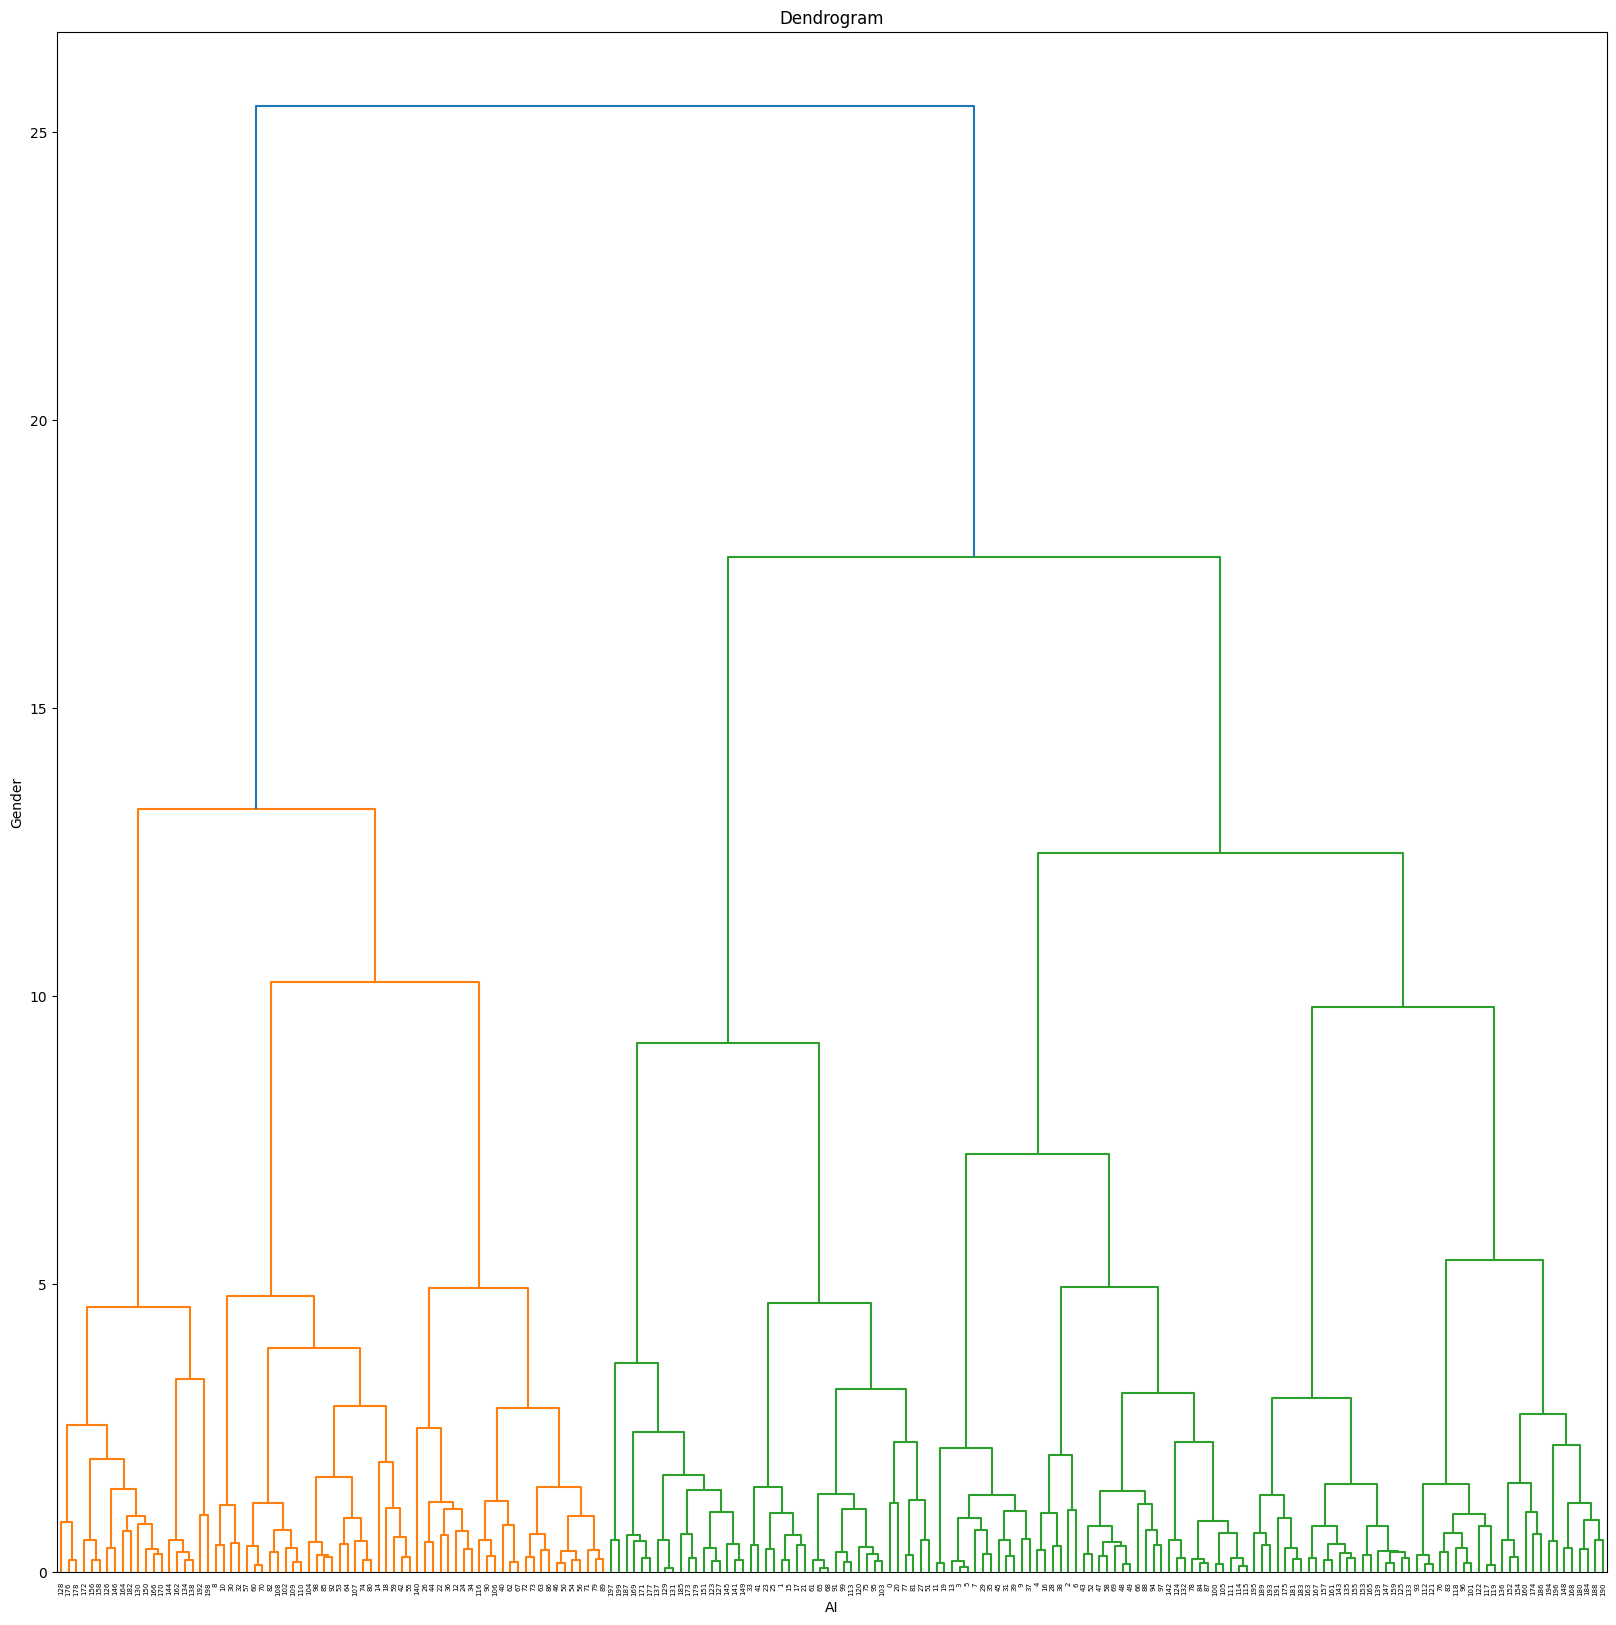

In [48]:
plt.figure(figsize=(20, 20))
dendrogram(z)
plt.title('Dendrogram')
plt.xlabel('AI')
plt.ylabel('Gender')
plt.show()


6.Determine the Optimal Number of Clusters

In [50]:
clusters = fcluster(z, t=5, criterion = 'maxclust')
df['Clusters'] = clusters
print(df.head())


   Gender  Age  AI  SS  Clusters
0       1   19  15  39         3
1       1   21  15  81         3
2       0   20  16   6         4
3       0   23  16  77         4
4       0   31  17  40         4


7.Analyze the Clusters

In [30]:
cluster_summary = df.groupby('Clusters').mean()
print(cluster_summary)


            Gender        Age         AI         SS
Clusters                                           
1         0.647887  51.690141  57.098592  32.197183
2         1.000000  28.690476  60.904762  70.238095
3         0.000000  33.275862  63.218391  55.218391


8.Visualize the Clusters

C:\Users\a.mohammadlou\AppData\Local\Temp\ipykernel_14820\3164401998.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  seaborn.scatterplot(data=df, x="SS", y="AI", hue=None, palette="string", hue_order="strings", hue_norm="tuple", sizes="list",


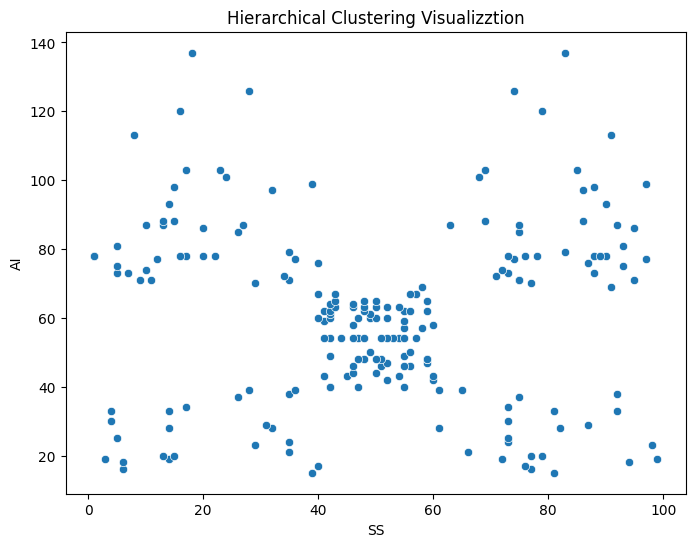

In [104]:
import seaborn
plt.figure(figsize=(8, 6))
seaborn.scatterplot(data=df, x="SS", y="AI", hue=None, palette="string", hue_order="strings", hue_norm="tuple", sizes="list",
                    size_order="list", size_norm="Normalize object", markers=list, style_order="list", legend='auto')
plt.title('Hierarchical Clustering Visualizztion')
plt.show()


DBSCAN

1.Import Required Libraries

In [118]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 


2Load a Dataset

In [106]:
print(df.head())


   Gender  Age  AI  SS  Clusters
0       1   19  15  39         3
1       1   21  15  81         3
2       0   20  16   6         4
3       0   23  16  77         4
4       0   31  17  40         4


3.Data Preprocessing

In [107]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
print(df_scaled[:5])


[[ 1.12815215 -1.42456879 -1.73899919 -0.43480148 -0.15938849]
 [ 1.12815215 -1.28103541 -1.73899919  1.19570407 -0.15938849]
 [-0.88640526 -1.3528021  -1.70082976 -1.71591298  0.5996043 ]
 [-0.88640526 -1.13750203 -1.70082976  1.04041783  0.5996043 ]
 [-0.88640526 -0.56336851 -1.66266033 -0.39597992  0.5996043 ]]


4.Apply DBSCAN

In [108]:
dbscan = DBSCAN(eps = 1.5, min_samples = 5)
dbscan.fit(df_scaled)
labels = dbscan.labels_
df['Clusters'] = labels
print(df.head())


   Gender  Age  AI  SS  Clusters
0       1   19  15  39         0
1       1   21  15  81         0
2       0   20  16   6         1
3       0   23  16  77         1
4       0   31  17  40         1


5.Analyze the Results

In [109]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"Number of Clusters : {n_clusters}")
print(f"Number of noise points: {n_noise}")


Number of Clusters : 3
Number of noise points: 1


6.Visualize the Clusters

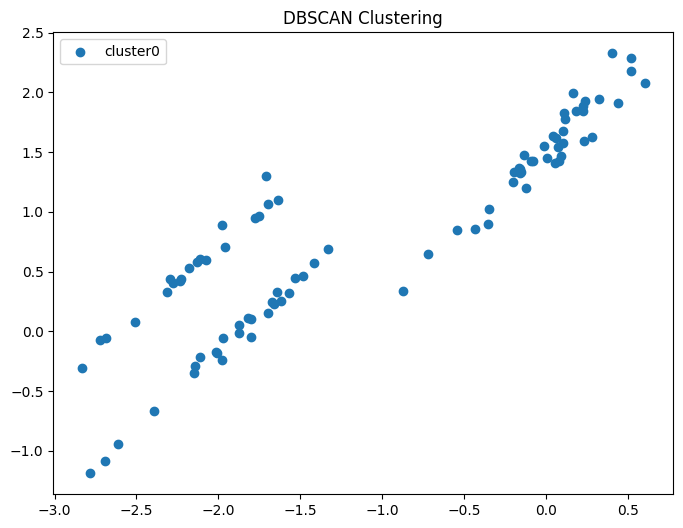

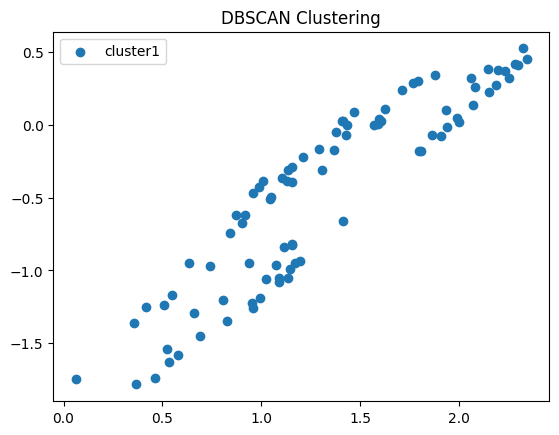

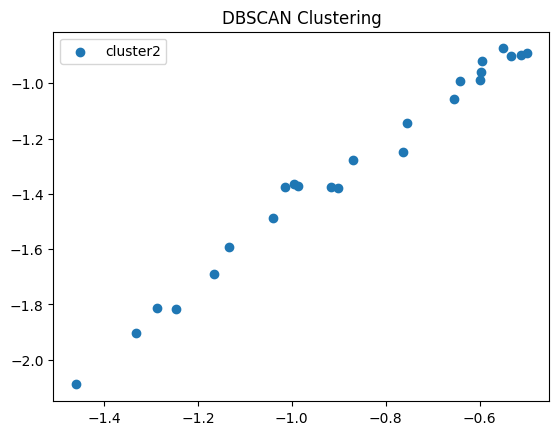

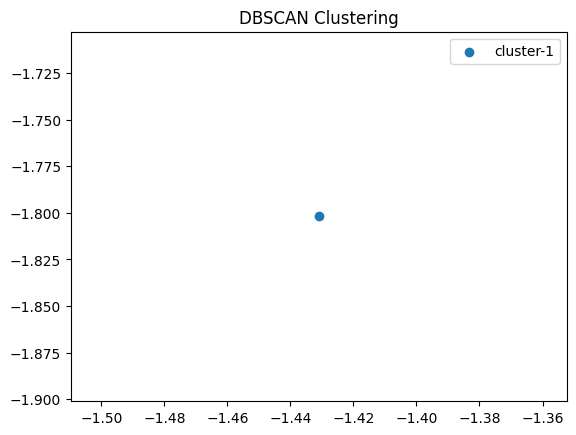

In [117]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 5)
df_2 = pca.fit_transform(df_scaled)
plt.figure(figsize = (8, 6))
unique_labels = set(labels)
for label in unique_labels:
    label_mask = (labels == label)
    plt.scatter(df_2[label_mask, 0],
               df_2[label_mask, 1], label = f"cluster{label}")
    plt.title("DBSCAN Clustering")
    plt.legend()
    plt.show()